# Giải bài toán

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

# #6
# problem1 = [
#     [0,3,2],
#     [3,0,1],
#     [2,1,0]
# ]

#189
problem2 = [
    [0, 40, 26, 81],
    [40, 0, 77, 97],
    [26, 77, 0, 26],
    [81, 97, 26, 0]
]

# #1248
# problem3 = [
#     [0, 64, 378, 519, 434, 200],
#     [64, 0, 318, 455, 375, 164],
#     [378, 318, 0, 170, 265, 344],
#     [519, 455, 170, 0, 223, 428],
#     [434, 375, 265, 223, 0, 273],
#     [200, 164, 344, 428, 273, 0]
# ]

#1194
problem4 = [
    [0, 141, 134, 152, 173, 289, 326, 329, 285, 401, 388, 366, 343, 305, 276],
    [141, 0, 152, 150, 153, 312, 354, 313, 249, 324, 300, 272, 247, 201, 176],
    [134, 152, 0, 24, 48, 168, 210, 197, 153, 280, 272, 257, 237, 210, 181],
    [152, 150, 24, 0, 24, 163, 206, 182, 133, 257, 248, 233, 214, 187, 158],
    [173, 153, 48, 24, 0, 160, 203, 167, 114, 234, 225, 210, 190, 165, 137],
    [289, 312, 168, 163, 160, 0, 43, 90, 124, 250, 264, 270, 264, 267, 249],
    [326, 354, 210, 206, 203, 43, 0, 108, 157, 271, 290, 299, 295, 303, 287],
    [329, 313, 197, 182, 167, 90, 108, 0, 70, 164, 183, 195, 194, 210, 201],
    [285, 249, 153, 133, 114, 124, 157, 70, 0, 141, 147, 148, 140, 147, 134],
    [401, 324, 280, 257, 234, 250, 271, 164, 141, 0, 36, 67, 88, 134, 150],
    [388, 300, 272, 248, 225, 264, 290, 183, 147, 36, 0, 33, 57, 104, 124],
    [366, 272, 257, 233, 210, 270, 299, 195, 148, 67, 33, 0, 26, 73, 96],
    [343, 247, 237, 214, 190, 264, 295, 194, 140, 88, 57, 26, 0, 48, 71],
    [305, 201, 210, 187, 165, 267, 303, 210, 147, 134, 104, 73, 48, 0, 30],
    [276, 176, 181, 158, 137, 249, 287, 201, 134, 150, 124, 96, 71, 30, 0]
]

# #27603
# problem5 = [
#     [0, 74, 4110, 3048, 2267, 974, 4190, 3302, 4758, 3044, 3095, 3986, 5093, 6407, 5904, 8436, 6963, 6694, 6576, 8009, 7399, 7267, 7425, 9639, 9230, 8320, 9300, 8103, 7799],
#     [74, 0, 4070, 3000, 2214, 901, 4138, 3240, 4702, 2971, 3021, 3915, 5025, 6338, 5830, 8369, 6891, 6620, 6502, 7939, 7326, 7193, 7351, 9571, 9160, 8249, 9231, 8030, 7725],
#     [4110, 4070, 0, 1173, 1973, 3496, 892, 1816, 1417, 3674, 3778, 2997, 2877, 3905, 5057, 5442, 4991, 5151, 5316, 5596, 5728, 5811, 5857, 6675, 6466, 6061, 6523, 6165, 6164],
#     [3048, 3000, 1173, 0, 817, 2350, 1172, 996, 1797, 2649, 2756, 2317, 2721, 3974, 4548, 5802, 4884, 4887, 4960, 5696, 5537, 5546, 5634, 7045, 6741, 6111, 6805, 6091, 5977],
#     [2267, 2214, 1973, 817, 0, 1533, 1924, 1189, 2498, 2209, 2312, 2325, 3089, 4401, 4558, 6342, 5175, 5072, 5075, 6094, 5755, 5712, 5828, 7573, 7222, 6471, 7289, 6374, 6187],
#     [974, 901, 3496, 2350, 1533, 0, 3417, 2411, 3936, 2114, 2175, 3014, 4142, 5450, 4956, 7491, 5990, 5725, 5615, 7040, 6430, 6304, 6459, 8685, 8268, 7348, 8338, 7131, 6832],
#     [4190, 4138, 892, 1172, 1924, 3417, 0, 1233, 652, 3086, 3185, 2203, 1987, 3064, 4180, 4734, 4117, 4261, 4425, 4776, 4844, 4922, 4971, 5977, 5719, 5228, 5780, 5302, 5281],
#     [3302, 3240, 1816, 996, 1189, 2411, 1233, 0, 1587, 1877, 1979, 1321, 1900, 3214, 3556, 5175, 4006, 3947, 3992, 4906, 4615, 4599, 4700, 6400, 6037, 5288, 6105, 5209, 5052],
#     [4758, 4702, 1417, 1797, 2498, 3936, 652, 1587, 0, 3286, 3374, 2178, 1576, 2491, 3884, 4088, 3601, 3818, 4029, 4180, 4356, 4469, 4497, 5331, 5084, 4645, 5143, 4761, 4787],
#     [3044, 2971, 3674, 2649, 2209, 2114, 3086, 1877, 3286, 0, 107, 1360, 2675, 3822, 2865, 5890, 4090, 3723, 3560, 5217, 4422, 4257, 4428, 7000, 6514, 5455, 6587, 5157, 4802],
#     [3095, 3021, 3778, 2756, 2312, 2175, 3185, 1979, 3374, 107, 0, 1413, 2725, 3852, 2826, 5916, 4088, 3705, 3531, 5222, 4402, 4229, 4403, 7017, 6525, 5451, 6598, 5142, 4776],
#     [3986, 3915, 2997, 2317, 2325, 3014, 2203, 1321, 2178, 1360, 1413, 0, 1315, 2511, 2251, 4584, 2981, 2778, 2753, 4031, 3475, 3402, 3531, 5734, 5283, 4335, 5355, 4143, 3897],
#     [5093, 5025, 2877, 2721, 3089, 4142, 1987, 1900, 1576, 2675, 2725, 1315, 0, 1323, 2331, 3350, 2172, 2275, 2458, 3007, 2867, 2935, 2988, 4547, 4153, 3400, 4222, 3376, 3307],
#     [6407, 6338, 3905, 3974, 4401, 5450, 3064, 3214, 2491, 3822, 3852, 2511, 1323, 0, 2350, 2074, 1203, 1671, 2041, 1725, 1999, 2213, 2173, 3238, 2831, 2164, 2901, 2285, 2397],
#     [5904, 5830, 5057, 4548, 4558, 4956, 4180, 3556, 3884, 2865, 2826, 2251, 2331, 2350, 0, 3951, 1740, 1108, 772, 2880, 1702, 1450, 1650, 4779, 4197, 2931, 4270, 2470, 2010],
#     [8436, 8369, 5442, 5802, 6342, 7491, 4734, 5175, 4088, 5890, 5916, 4584, 3350, 2074, 3951, 0, 2222, 2898, 3325, 1276, 2652, 3019, 2838, 1244, 1089, 1643, 1130, 2252, 2774],
#     [6963, 6891, 4991, 4884, 5175, 5990, 4117, 4006, 3601, 4090, 4088, 2981, 2172, 1203, 1740, 2222, 0, 684, 1116, 1173, 796, 1041, 974, 3064, 2505, 1368, 2578, 1208, 1201],
#     [6694, 6620, 5151, 4887, 5072, 5725, 4261, 3947, 3818, 3723, 3705, 2778, 2275, 1671, 1108, 2898, 684, 0, 432, 1794, 104, 349, 309, 2484, 1919, 670, 2014, 824, 696],
#     [6576, 6502, 5316, 4960, 5075, 5615, 4425, 3992, 4029, 3560, 3531, 2753, 2458, 2041, 772, 3325, 1116, 432, 0, 2149, 377, 154, 348, 2646, 2081, 823, 2205, 904, 618],
#     [8009, 7939, 5596, 5696, 6094, 7040, 4776, 4906, 4180, 5217, 5222, 4031, 3007, 1725, 2880, 1276, 1173, 1794, 2149, 0, 1860, 2219, 2072, 1549, 1454, 2406, 1377, 2269, 2781],
#     [7399, 7326, 5728, 5537, 5755, 6430, 4844, 4615, 4356, 4422, 4402, 3475, 2867, 1999, 1702, 2652, 796, 104, 377, 1860, 0, 243, 151, 2552, 1997, 780, 2080, 906, 697],
#     [7267, 7193, 5811, 5546, 5712, 6304, 4922, 4599, 4469, 4257, 4229, 3402, 2935, 2213, 1450, 3019, 1041, 349, 154, 2219, 243, 0, 203, 2717, 2152, 939, 2256, 989, 665],
#     [7425, 7351, 5857, 5634, 5828, 6459, 4971, 4700, 4497, 4428, 4403, 3531, 2988, 2173, 1650, 2838, 974, 309, 348, 2072, 151, 203, 0, 2577, 2015, 847, 2116, 938, 683],
#     [9639, 9571, 6675, 7045, 7573, 8685, 5977, 6400, 5331, 7000, 7017, 5734, 4547, 3238, 4779, 1244, 3064, 2484, 2646, 1549, 2552, 2717, 2577, 0, 550, 1525, 505, 1605, 2208],
#     [9230, 9160, 6466, 6741, 7222, 8268, 5719, 6037, 5084, 6514, 6525, 5283, 4153, 2831, 4197, 1089, 2505, 1919, 2081, 1454, 1997, 2152, 2015, 550, 0, 1150, 44, 1091, 1647],
#     [8320, 8249, 6061, 6111, 6471, 7348, 5228, 5288, 4645, 5455, 5451, 4335, 3400, 2164, 2931, 1643, 1368, 670, 823, 2406, 780, 939, 847, 1525, 1150, 0, 1189, 269, 380],
#     [9300, 9231, 6523, 6805, 7289, 8338, 5780, 6105, 5143, 6587, 6598, 5355, 4222, 2901, 4270, 1130, 2578, 2014, 2205, 1377, 2080, 2256, 2116, 505, 44, 1189, 0, 1049, 1603],
#     [8103, 8030, 6165, 6091, 6374, 7131, 5302, 5209, 4761, 5157, 5142, 4143, 3376, 2285, 2470, 2252, 1208, 824, 904, 2269, 906, 989, 938, 1605, 1091, 269, 1049, 0, 587],
#     [7799, 7725, 6164, 5977, 6187, 6832, 5281, 5052, 4787, 4802, 4776, 3897, 3307, 2397, 2010, 2774, 1201, 696, 618, 2781, 697, 665, 683, 2208, 1647, 380, 1603, 587, 0]
# ]

def solve(problem):
    n_cities = len(problem)
    solution = genetic_algorithm(n_cities, problem, population_size=100, generations=100, mutation_rate=0.001)
    return solution['distance'], solution['route'], solution['fitness']

def visualize(problem, route, draw_weight=False, initial=False):
    n_cities = len(problem)
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=problem[i][j])

    pos = nx.circular_layout(G, scale=2)

    plt.figure(figsize=(14, 7))
    if initial:
        plt.subplot(121)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        if draw_weight:
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.5)
        plt.title("Initial Graph")

    # Highlight the best route and remove non-route edges for clarity
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    route_edges.append((route[-1], route[0]))  # Complete the cycle

    # Remove non-route edges
    non_route_edges = [edge for edge in G.edges() if edge not in route_edges and (edge[1], edge[0]) not in route_edges]
    G.remove_edges_from(non_route_edges)

    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)
    if draw_weight:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.6)
    plt.title(f"Best Route\n{route}")

    plt.show()



Best route: [0, 1, 2, 3, 4, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 0]
Shortest distance: 1302


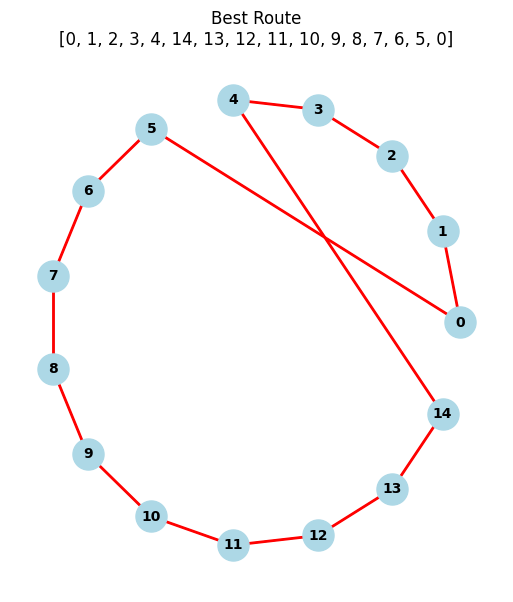

In [107]:
problem = problem4
distances, route, fitness = solve(problem)
print(f"Best route: {route}")
print(f"Shortest distance: {distances}")
visualize(problem, route)

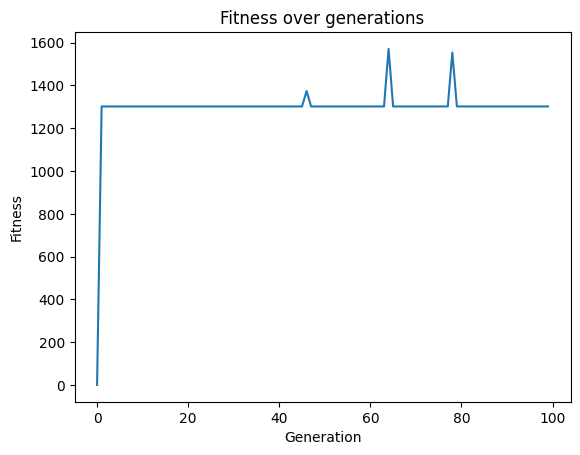

In [108]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

## Note: mỗi hàm selection, crossover, mutate sẽ làm khoảng 2-3 thuật toán nữa, cụ thể: 
### Selection: 
* Roulette wheel selection
* Tournament Selection
* Rank Selection
* Elitism Selection (đã làm)
### Crossover
* Single-Point Crossover
* Two-Point Crossover
* Uniform crossover 
* Order Crossover (đã làm)
### Mutation
* Scramble Mutation
* Inversion Mutation
* Swap Mutation (đã làm)
### Làm vào file GA.py như mẫu

## Có 2 bài test case mẫu (problem 2 và problem 4) đã có đáp án, dự kiến sẽ test thuật toán trên đó. Dùng hàm plot_fitness đã định nghĩa để trực quan hóa độ chính xác của thuật toán. Code thí nghiệm ở file Experiment.ipynb. Đưa ra những kết luận ngay trong file, làm tiền đề cho tiểu luận. Về thí nghiệm như nào sẽ bàn bạc sau.